In [1]:
import os
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [2]:
from IPython.display import Markdown, display
def printmd(string):
    display(Markdown(string))
#printmd('**bold**')

In [3]:
file_name = "poems_with_tags_all.zip"
poem_df = pd.read_csv('poems_with_tags_all.zip', compression='zip', header=0, quotechar='"')


In [4]:
#'写物', '劝勉', '家庭', '快乐', '悲苦', '政治', '朋友', '游玩'
poem_df.rename(columns={'写物': 'object_', '劝勉': 'encourage_', '家庭':'family_', '快乐':'happiness_',\
          '悲苦': 'sadness_', '政治': 'policy_', '朋友': 'friend_', '游玩': 'travel_'}, inplace=True)


poem_df = poem_df[poem_df.dynasty!='未知']


In [5]:
poem_df.dynasty.unique()

array(['宋代', '明代', '元代', '唐代', '清代', '五代', '两汉', '魏晋', '金朝', '近代', '先秦',
       '南北朝', '隋代'], dtype=object)

In [6]:
# 夏、商、周[西周、东周(春秋、战国)]、秦、西汉、新朝、玄汉、东汉、
# 三国时期(魏、蜀、吴)、晋(西晋、东晋)、南北朝[南朝(宋、齐、梁、陈)、
# 北朝(北魏、东魏、西魏、北齐、北周)、
# 隋、唐、五代(后梁、后唐、后晋、后汉、后周)、十国[前蜀、后蜀、吴、南唐、吴越、闽、楚、南汉、南平(荆南)、北汉]、
# 宋(北宋、南宋)、辽、西夏、金、元、明、清、中华民国、中华人民共和国。
                         
#                          '宋代', '明代', '元代', '唐代', '清代', '五代', '两汉', '魏晋', '金朝', '近代', '先秦',
#        '南北朝', '隋代'

In [7]:
poem_df.head(2)

,content,dynasty,author,tags,star,author_stars,title,tags_list,object_,encourage_,family_,happiness_,sadness_,policy_,friend_,travel_
0,《吴都赋》云：“户藏烟浦，家具画船。”唯吴兴为然。春游之盛，西湖未能过也。己酉岁，予与萧时父...,宋代,姜夔,春游;怀人;,64,279,琵琶仙·《吴都赋》云：「户藏烟浦,"['春游', '怀人']",0,0,0,0,0,1,0,1
1,《廿一史弹词》第三段说秦汉开场词滚滚长江东逝水，浪花淘尽英雄。是非成败转头空。青山依旧在，几...,明代,杨慎,咏史;抒怀;人生;哲理,3244,131,临江仙·滚滚长江东逝水,"['咏史', '抒怀', '人生', '哲理']",1,1,0,0,1,1,0,0


In [8]:
TAGS_NAME = ['object_','encourage_','family_','happiness_','sadness_','policy_','friend_','travel_']
one_hot_encoding = poem_df.iloc[:,8:].to_numpy()

In [9]:
type(one_hot_encoding)

numpy.ndarray

In [10]:
tags = []
for row in one_hot_encoding.tolist():
    row = np.array(row)
    TAGS_NAME = np.array(TAGS_NAME)
    tag_list = TAGS_NAME[row==1]
    tags.append(tag_list.tolist())

In [11]:
# Your OHE dataframe 
poem_df_processed = poem_df[['object_','encourage_','family_','happiness_','sadness_','policy_','friend_','travel_']]
#先秦,两汉,魏晋,南北朝,隋代,唐代,五代,宋代,金朝,元代,明代,清代,近代
先秦_poems_info = poem_df[poem_df.dynasty=='先秦']
两汉_poems_info = poem_df[poem_df.dynasty=='两汉']
魏晋_poems_info = poem_df[poem_df.dynasty=='魏晋']
南北朝_poems_info = poem_df[poem_df.dynasty=='南北朝']
隋代_poems_info = poem_df[poem_df.dynasty=='隋代']
唐代_poems_info = poem_df[poem_df.dynasty=='唐代']
五代_poems_info = poem_df[poem_df.dynasty=='五代']
宋代_poems_info = poem_df[poem_df.dynasty=='宋代']
金朝_poems_info = poem_df[poem_df.dynasty=='金朝']
元代_poems_info = poem_df[poem_df.dynasty=='元代']
明代_poems_info = poem_df[poem_df.dynasty=='明代']
清代_poems_info = poem_df[poem_df.dynasty=='清代']
近代_poems_info = poem_df[poem_df.dynasty=='近代']
先秦labels = list(先秦_poems_info.columns.values)[8:]
两汉labels = list(两汉_poems_info.columns.values)[8:]
魏晋labels = list(魏晋_poems_info.columns.values)[8:]
南北朝labels = list(南北朝_poems_info.columns.values)[8:]
隋代labels = list(隋代_poems_info.columns.values)[8:]
唐代labels = list(唐代_poems_info.columns.values)[8:]
五代labels = list(五代_poems_info.columns.values)[8:]
宋代labels = list(宋代_poems_info.columns.values)[8:]
金朝labels = list(金朝_poems_info.columns.values)[8:]
元代labels = list(元代_poems_info.columns.values)[8:]
明代labels = list(明代_poems_info.columns.values)[8:]
清代labels = list(清代_poems_info.columns.values)[8:]
近代labels = list(近代_poems_info.columns.values)[8:]
先秦_poems_info = poem_df[poem_df.dynasty=='先秦'].iloc[:,8:].sum().values
两汉_poems_info = poem_df[poem_df.dynasty=='两汉'].iloc[:,8:].sum().values
魏晋_poems_info = poem_df[poem_df.dynasty=='魏晋'].iloc[:,8:].sum().values
南北朝_poems_info = poem_df[poem_df.dynasty=='南北朝'].iloc[:,8:].sum().values
隋代_poems_info = poem_df[poem_df.dynasty=='隋代'].iloc[:,8:].sum().values
唐代_poems_info = poem_df[poem_df.dynasty=='唐代'].iloc[:,8:].sum().values
五代_poems_info = poem_df[poem_df.dynasty=='五代'].iloc[:,8:].sum().values
宋代_poems_info = poem_df[poem_df.dynasty=='宋代'].iloc[:,8:].sum().values
金朝_poems_info = poem_df[poem_df.dynasty=='金朝'].iloc[:,8:].sum().values
元代_poems_info = poem_df[poem_df.dynasty=='元代'].iloc[:,8:].sum().values
明代_poems_info = poem_df[poem_df.dynasty=='明代'].iloc[:,8:].sum().values
清代_poems_info = poem_df[poem_df.dynasty=='清代'].iloc[:,8:].sum().values
近代_poems_info = poem_df[poem_df.dynasty=='近代'].iloc[:,8:].sum().values

In [12]:
type(清代_poems_info)

numpy.ndarray

In [13]:
graph_df = pd.DataFrame([先秦_poems_info,
                        两汉_poems_info,
                        魏晋_poems_info,
                        南北朝_poems_info,
                        隋代_poems_info,
                        唐代_poems_info,
                        五代_poems_info,
                        宋代_poems_info,
                        金朝_poems_info,
                        元代_poems_info,
                        明代_poems_info,
                        清代_poems_info,
                        近代_poems_info])

In [14]:
graph_df['dynasty']=["xian_qin","liang_han","wei_jin","nan_bei_chao","sui_dai","tang_dai",
                     "wu_dai","song_dai","jin_chao","yuan_dai","min_dai","qin_dai","morden"]


In [17]:
graph_df = graph_df.set_index('dynasty')
graph_df.columns =['object_','encourage_','family_','happiness_','sadness_','policy_','friend_','travel_']

In [18]:
graph_df

,object_,encourage_,family_,happiness_,sadness_,policy_,friend_,travel_
dynasty,,,,,,,,
xian_qin,52,17,3,4,6,52,4,17
liang_han,66,31,5,13,32,77,7,15
wei_jin,67,48,28,50,95,97,14,32
nan_bei_chao,44,33,15,15,60,83,28,17
sui_dai,2,1,1,2,5,4,2,2
tang_dai,1852,734,331,522,1921,2518,598,728
wu_dai,53,16,8,16,77,51,24,14
song_dai,2309,1179,262,688,3096,2634,1112,988
jin_chao,9,41,1,2,13,17,8,4


findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.


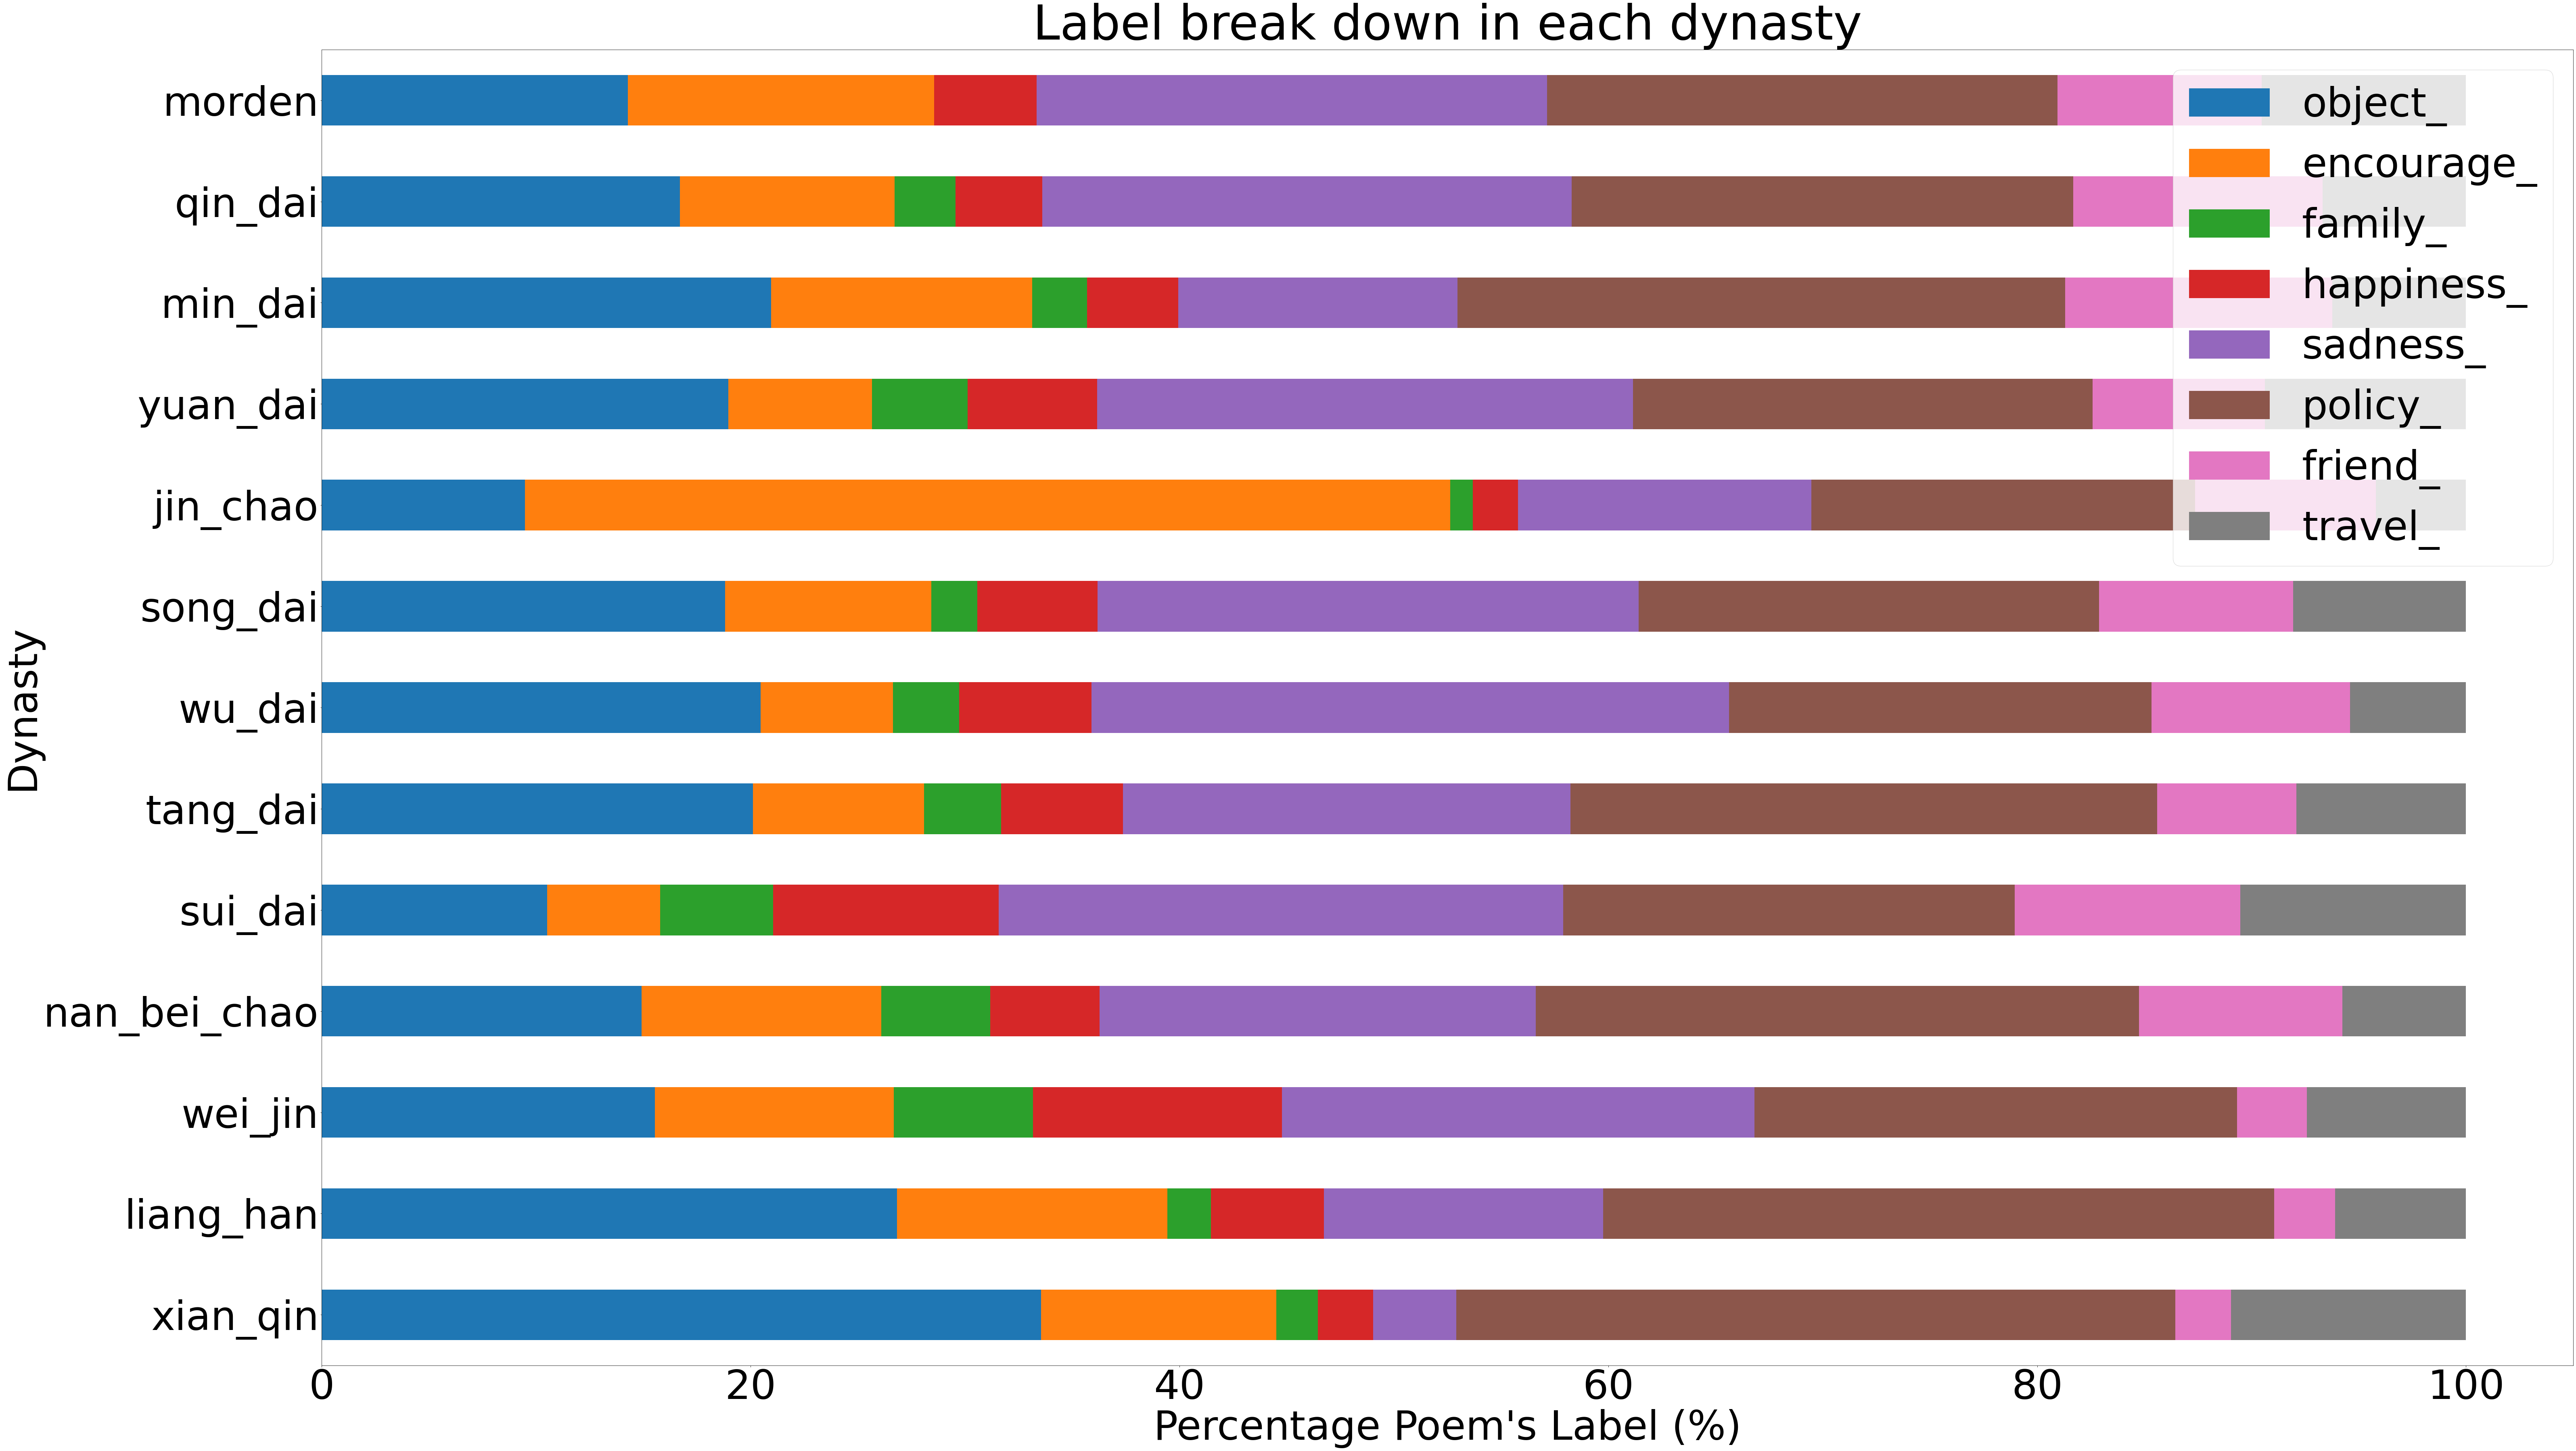

In [25]:
stacked_data = graph_df.apply(lambda x: x*100/sum(x), axis=1)
stacked_data.plot(kind="barh", stacked=True)
plt.rcParams["figure.figsize"] = [100, 60]
plt.title("Label break down in each dynasty")
plt.ylabel("Dynasty")
plt.xlabel("Percentage Poem's Label (%)")
plt.legend(loc='upper right')
# plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["font.size"] = "200"